In [142]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import koreanize_matplotlib
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from scipy import stats
# feature : 무게, target : 길이, 데이터 비율(훈련:테스트 = 0.7:0.3)

df=pd.read_csv("../data/fish.csv")
test=df[["Species","Weight","Length"]]


In [143]:
z = np.abs(stats.zscore(test[["Weight","Length"]]))

threshold = 2
print(np.where(z > threshold))

(array([140, 141, 141, 142, 142, 143, 143, 144, 144], dtype=int64), array([1, 0, 1, 0, 1, 0, 1, 0, 1], dtype=int64))


In [144]:
df=test[~test["Species"].isin(["Pike"])]

In [145]:
feature=df[["Weight"]]
target=df["Length"]

In [146]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.3)

In [148]:
for i in range(1,20):
    for j in ['uniform','distance']:
        for s in ['auto','ball_tree','kd_tree','brute']:
            model = KNeighborsRegressor(n_neighbors=i, weights=j, algorithm=s)
            model.fit(x_train, y_train)
            y_pre=model.predict(x_test)
            score.setdefault((i,j,s),[model.score(x_train, y_train),model.score(x_test, y_test),mean_squared_error(y_test, y_pre, squared=False) ,mean_absolute_error(y_test, y_pre)]) 

In [165]:
# 성능 ,R^2, 오차제곱합, 오차절댓값합
max(score, key=score.get), max(score.values())

((16, 'distance', 'brute'),
 [0.9883011847269898,
  0.9697291112527947,
  1.5035070268669721,
  1.129190053364137])

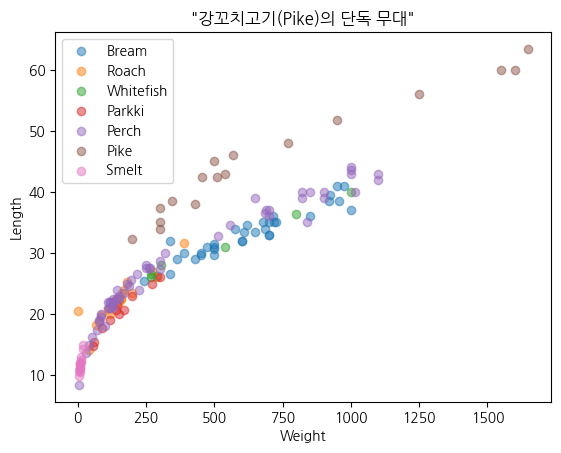

In [167]:
df=pd.read_csv("../data/fish.csv")
for i in df["Species"].unique():
    test=df[df["Species"]==i]
    plt.scatter(test["Weight"],test["Length"], label=i, alpha=0.5)
plt.legend()
plt.xlabel("Weight")
plt.ylabel("Length")
plt.title("\"강꼬치고기(Pike)의 단독 무대\"")
plt.show()

 해당 Dataset에 어류가 품종별로 있으므로,    


 너무 튀는 강꼬치고기를 없애버리고(씨익),    
 회귀분석을 하였을 때    
 최고의 값은 다음과 같다    

n_neighbors = 16
weights = 'distance'
algorithm = 'brute'

 train score : 98.8%
 test_score : 96.9% 
 오차제곱합 : 1.5
 오차절댓값 합 : 1.12